# 4.9 Tasks part 1

#### 1. import libraries and dataframes

#### 2. Wrangle data set

#### 3. Cleaning data set

#### 4. Analyse two cutomer groups (customers which stayed and customers which left)

#### 5. Create decision tree

#### 6. Export datasets

## 1. Import libraries and dataframes

In [84]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [12]:
#set scripts path in variable 'path'
path = r'/Users/constantinmelachrinos/Documents/careerfoundry data analyst/Course files/Data Analytics Immersion/Achievement 5 - Big Data'

#import data_sets
df_original = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', '5.4-PigEBank-Client-Data set.xlsx'))

# 2. Wrangle data set

In [13]:
#first have a look at the dataframe for completness
df_original.head()

,Row_Number,Customer_ID,Last_Name,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [18]:
# Descriptive analysis of the data set
df_original.describe()

,Row_Number,Customer_ID,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,991.00000,9.910000e+02,988.000000,990.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,991.000000
mean,496.00000,1.569232e+07,648.512146,38.684848,5.066599,78002.718063,1.522704,0.706357,0.507568,98574.543013,0.205853
std,286.22136,7.223333e+04,98.202853,10.958220,2.928371,62799.237345,0.573170,0.455660,0.500195,57224.716446,0.404527
min,1.00000,1.556609e+07,376.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.000000
25%,248.50000,1.563019e+07,579.750000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48559.190000,0.000000
50%,496.00000,1.569275e+07,653.500000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98368.240000,0.000000
75%,743.50000,1.575379e+07,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146326.450000,0.000000
max,991.00000,1.581536e+07,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


In [20]:
#Data types in the data set
df_original.dtypes

Row_Number            int64
Customer_ID           int64
Credit Score        float64
Country              object
Gender               object
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard?            int64
IsActiveMember        int64
Estimated Salary    float64
ExitedFromBank?       int64
dtype: object

In [22]:
df_original.shape

(991, 13)

# 3. Clean data set 
### 3.1 Address PII in data set and delete appropriate columns

In [14]:
# drop column 'Last_name' which is PII information and wont be needed for analysis
df_original.drop(columns=['Last_Name'], inplace=True)

In [23]:
# drop column 'Last_name' which is PII information and wont be needed for analysis
df_original.drop(columns=['Row_Number'], inplace=True)

In [24]:
df_original.head()

,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### 3.2 change names of columns to appropriate naming rules

In [35]:
#change names of columns to consistent naming
df_original=df_original.rename(columns={
        'Customer_ID': 'customer_id',
        'Credit Score': 'credit_score',
        'Country': 'country',
        'Gender': 'gender',
        'Age': 'age', 
        'Tenure': 'tenure',
        'Balance': 'balance',
        'NumOfProducts': 'num_of_products',
        'HasCrCard?': 'credit_card',
        'IsActiveMember': 'active_memebr',
        'Estimated Salary': 'est_salary',
        'ExitedFromBank?': 'leave_bank'})

In [36]:
df_original.head()

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [33]:
# change customer_id type to string
df_original = df_original.astype({'customer_id': str})

In [34]:
df_original.dtypes

customer_id         object
credit_score       float64
Country             object
Gender              object
age                float64
tenure               int64
balance            float64
num_of_products      int64
credit_card          int64
active_memebr        int64
est_salary         float64
leave_bank           int64
dtype: object

### 3.3 check naming conventions

In [40]:
#check naming convention of column 'country'
df_original['country'].value_counts()

country
FR         244
France     236
Germany    234
Spain      136
ES         118
DE          23
Name: count, dtype: int64

In [41]:
#check naming convention of column 'gender'
df_original['gender'].value_counts()

gender
Male      479
Female    443
M          49
F          19
Name: count, dtype: int64

In [42]:
#Standardize naming convention of countries to full names
df_original['country'] = df_original['country'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany'})

In [43]:
#check outcome
df_original['country'].value_counts()

country
France     480
Germany    257
Spain      254
Name: count, dtype: int64

In [44]:
#Change namin convention of gender to full names
df_original['gender'] = df_original['gender'].replace({'M': 'Male', 'F': 'Female'})

In [45]:
#check outcome
df_original['gender'].value_counts()

gender
Male      528
Female    462
Name: count, dtype: int64

### 3.4 check missing values

In [46]:
#check if there are any missing values in any columns in the dataframe
df_original.isnull().sum()

customer_id        0
credit_score       3
country            0
gender             1
age                1
tenure             0
balance            0
num_of_products    0
credit_card        0
active_memebr      0
est_salary         2
leave_bank         0
dtype: int64

In [61]:
#df_original[df_original['credit_score'].isnull() == True]
df_original[df_original.isnull().any(axis=1)]

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
11,15737173,497.0,Spain,NaN,24.0,3,0.00,2,1,0,76390.01,0
21,15597945,636.0,Spain,Female,32.0,8,0.00,2,1,0,NaN,0
22,15699309,510.0,Spain,Female,NaN,4,0.00,1,1,0,118913.53,1
204,15627801,NaN,Spain,Male,33.0,3,176666.62,1,1,0,94670.77,0
214,15785542,NaN,Germany,Male,26.0,4,118287.01,2,0,0,NaN,0
976,15570060,NaN,France,Female,43.0,8,132558.26,1,1,0,67046.83,1


#### The affected amount of rows with NaN values are only 6 out of 991 rows which is 0,6% of the whole data set. Which means they will have nearly no affect on the analysis. 
#### these rows will be deleted.

In [68]:
#deleting rows with NaN values
df_cleaned = df_original.dropna()

In [69]:
#check if executed correctly
df_cleaned.describe()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.00000,985.000000,985.000000
mean,648.819289,38.720812,5.067005,78043.839299,1.522843,0.705584,0.51066,98612.387716,0.205076
std,98.133184,10.964105,2.932433,62726.971080,0.573585,0.456011,0.50014,57323.923406,0.403962
min,376.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.00000,371.050000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.00000,48071.610000,0.000000
50%,654.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.00000,98453.450000,0.000000
75%,721.000000,44.000000,8.000000,129433.340000,2.000000,1.000000,1.00000,146457.830000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.00000,199725.390000,1.000000


### 3.5 check for duplicates

In [70]:
#write duplicates in a new dataframe called 'df_customers_dups'
df_dup = df_cleaned[df_cleaned.duplicated()]

In [71]:
df_dup

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank


#### no duplicates found

### 3.6 Convert mixed data types

In [73]:
#check for mixed types
for col in df_cleaned.columns.tolist():
  weird = (df_cleaned[[col]].map(type) != df_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cleaned[weird]) > 0:
    print (col)

#### no mixed datatypes found

### 3.7 check for outliers or unusual values

In [77]:
#check if executed correctly
df_cleaned.describe()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.00000,985.000000,985.000000
mean,648.819289,38.720812,5.067005,78043.839299,1.522843,0.705584,0.51066,98612.387716,0.205076
std,98.133184,10.964105,2.932433,62726.971080,0.573585,0.456011,0.50014,57323.923406,0.403962
min,376.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.00000,371.050000,0.000000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.00000,48071.610000,0.000000
50%,654.000000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.00000,98453.450000,0.000000
75%,721.000000,44.000000,8.000000,129433.340000,2.000000,1.000000,1.00000,146457.830000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.00000,199725.390000,1.000000


### looking at the data it comes to my attention that minimum of age 2 is a real outlier and needs to be looked at.
### Minimum salary of 371 looks also like anoutlier but it could be that this person is just doing a side job as a student.

In [82]:
# calculate IQR for column age
Q1 = df_cleaned['age'].quantile(0.25)
Q3 = df_cleaned['age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 3
outliers = df_cleaned[(df_cleaned['age'] < Q1 - threshold * IQR) | (df_cleaned['age'] > Q3 + threshold * IQR)]

In [83]:
outliers

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
766,15810864,700.0,France,Female,82.0,2,0.0,2,0,1,182055.36,0


### One outlier found but the age of 82 is a possible age so i wont address this outlier.

In [90]:
#create a box plot for column 'age'

fig = px.box(df_cleaned, y='age')

fig.show()

### we can see obviously that there is an outlier with age 2 in the box plot above.

In [96]:
# check in dataframe how often the age 2 is appearing in the dataframe
df_cleaned[df_cleaned['age'] == 2]

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
624,15745307,477.0,Spain,Female,2.0,2,129120.64,1,0,1,26475.79,0
629,15692463,799.0,Spain,Female,2.0,3,142253.65,1,1,0,45042.56,0
632,15718673,839.0,Spain,Female,2.0,10,75592.43,1,1,0,62674.42,0
635,15633648,696.0,Spain,Female,2.0,5,0.00,2,1,0,55022.43,0
636,15603323,660.0,Spain,Female,2.0,1,0.00,2,0,0,117834.91,0
673,15745621,640.0,Spain,Female,2.0,6,118879.35,2,1,1,19131.71,0
676,15607040,593.0,Spain,Female,2.0,4,88736.44,2,1,0,67020.03,0
678,15810978,788.0,Spain,Female,2.0,1,0.00,2,1,1,41610.62,0
679,15668886,684.0,Spain,Female,2.0,3,0.00,2,1,0,44255.65,0
702,15603436,594.0,Spain,Female,2.0,2,126615.94,2,0,1,123214.74,0


In [99]:
#deleting rows with values of 2 in column 'age'
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['age'] == 2].index)

In [100]:
#check if 11 rows are deleted
df_cleaned.describe()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,648.528747,39.135524,5.083162,78136.938152,1.519507,0.705339,0.512320,99090.626006,0.206366
std,98.072653,10.303120,2.933007,62792.126412,0.572700,0.456125,0.500105,57354.812798,0.404904
min,376.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.000000
25%,579.250000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,49235.547500,0.000000
50%,654.000000,37.000000,5.000000,99019.140000,1.000000,1.000000,1.000000,99421.190000,0.000000
75%,721.000000,44.000000,8.000000,129497.155000,2.000000,1.000000,1.000000,147102.400000,0.000000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


## 4 Analyse two customer groups - customers who left the bank and customers who stayed

## 4.1 Separate the clients into 2 groups: one for those who have left the bank and a second for those who have stayed

In [101]:
# Separate clients in two dataframes 'cust_left' for customers who left and 'cust_stayed' for customers which stayed
cust_left = df_cleaned[df_cleaned['leave_bank'] == 1]
cust_stayed = df_cleaned[df_cleaned['leave_bank'] == 0]

In [102]:
# check if together they have 974 rows
len(cust_left)+len(cust_stayed)

974

## 4.2 Descriptive analysis on the two groups

In [104]:
#Descriptive Analysis of the customers which left
cust_left.describe()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,637.074627,45.288557,4.711443,90495.705920,1.457711,0.701493,0.303483,97597.273980,1.0
std,99.964291,9.601371,2.925119,61406.310726,0.761218,0.458746,0.460910,59651.828261,0.0
min,376.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,1.0
25%,564.000000,39.000000,2.000000,0.000000,1.000000,0.000000,0.000000,45071.090000,1.0
50%,643.000000,45.000000,5.000000,112822.260000,1.000000,1.000000,0.000000,101300.940000,1.0
75%,715.000000,51.000000,7.000000,133745.440000,2.000000,1.000000,1.000000,149756.710000,1.0
max,850.000000,69.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.0


In [105]:
cust_stayed.describe()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.0
mean,651.507115,37.535576,5.179819,74923.338771,1.535576,0.706339,0.566624,99478.936171,0.0
std,97.419777,9.873702,2.929218,62788.852205,0.511869,0.455733,0.495862,56775.659653,0.0
min,411.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.0
25%,583.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,52615.620000,0.0
50%,657.000000,36.000000,5.000000,93694.420000,2.000000,1.000000,1.000000,98820.390000,0.0
75%,723.000000,42.000000,8.000000,127864.400000,2.000000,1.000000,1.000000,146457.830000,0.0
max,850.000000,82.000000,10.000000,197041.800000,3.000000,1.000000,1.000000,199661.500000,0.0


### over 20% of the total customers left the bank.
### from looking at some descriptive analysis we can see that the average age of the customers who left is higher than the ones who stayed.
### Also the customers which left were less active than the ones which stayed.
### Looking at the average balance there is a significant difference between customers which stayed and customers which left.

# 4.2 Customer profiling country to customer status

In [106]:
df_cleaned.head()

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,credit_card,active_memebr,est_salary,leave_bank
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


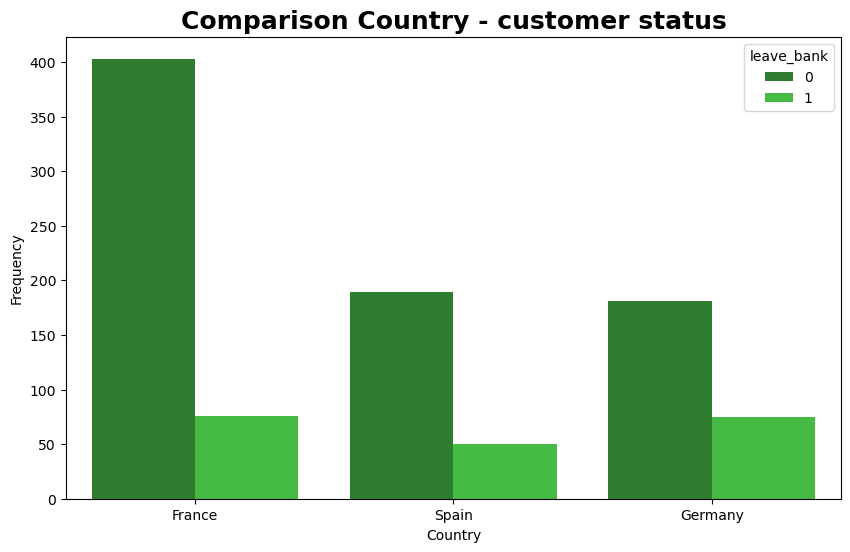

In [114]:
#create bar chart with comparison of age groups in different regions

plt.figure(figsize=(10, 6))
# define Seaborn color palette to use 
palette_color = ['#228B22','#32CD32']
#define column chart
bar=sns.countplot(x = 'country', 
            hue = 'leave_bank',
            data = df_cleaned, 
            palette=palette_color
            )
bar.set(
            xlabel='Country',
            ylabel='Frequency')
plt.title('Comparison Country - customer status', weight='bold').set_fontsize('18')
#export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Comp_country_status.png'))

In [117]:
cust_stayed['country'].value_counts()

country
France     403
Spain      189
Germany    181
Name: count, dtype: int64

In [118]:
cust_left['country'].value_counts()

country
France     76
Germany    75
Spain      50
Name: count, dtype: int64

### In proportion the most customers which left were from Germany. Around 40% of all german based customers.

## 4.3 Customer profiling gender to customer status

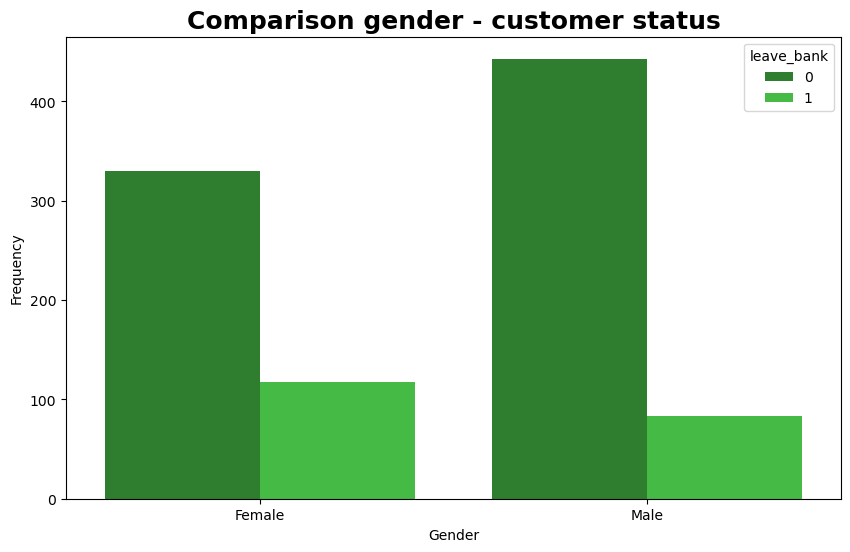

In [127]:
#create bar chart with comparison of age groups in different regions

plt.figure(figsize=(10, 6))
# define Seaborn color palette to use 
palette_color = ['#228B22','#32CD32']
#define column chart
bar=sns.countplot(x = 'gender', 
            hue = 'leave_bank',
            data = df_cleaned, 
            palette=palette_color
            )
bar.set(
            xlabel='Gender',
            ylabel='Frequency')
plt.title('Comparison gender - customer status', weight='bold').set_fontsize('18')
#export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Comp_gender_status.png'))

In [120]:
cust_stayed['gender'].value_counts()

gender
Male      443
Female    330
Name: count, dtype: int64

In [121]:
cust_left['gender'].value_counts()

gender
Female    118
Male       83
Name: count, dtype: int64

### In comparison more female customers left then male customers. Around 35%.

## 4.4 Customer profiling balance to customer status

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



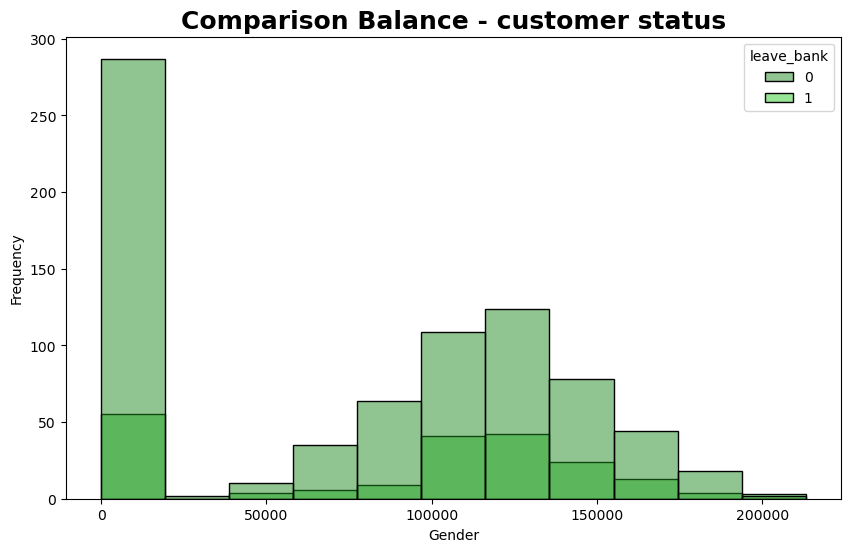

In [140]:

#create bar chart with comparison of age groups in different regions

plt.figure(figsize=(10, 6))
# define Seaborn color palette to use 
palette_color = ['#228B22','#32CD32']
#define column chart
bar=sns.histplot(x = 'balance', 
            hue = 'leave_bank',
            data = df_cleaned, 
            palette=palette_color
            )
bar.set(
            xlabel='Gender',
            ylabel='Frequency')
plt.title('Comparison Balance - customer status', weight='bold').set_fontsize('18')
#export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Comp_balance_status.png'))

### in the visualization above its obvious to see that the customers which left had a more concentrated balance between 90.000 and 130.000.

## 4.5 Check cmparisons with correlation matrix

### 4.5.1 Add categorical flag to dataframe for female customer or not

In [144]:
#loc function for female flag
df_cleaned.loc[df_cleaned['gender'] == 'Female', 'gender_female'] = 1
df_cleaned.loc[df_cleaned['gender'] == 'Male', 'gender_female'] = 0

In [146]:
#check on proper execution
df_cleaned['gender_female'].value_counts()

gender_female
0.0    526
1.0    448
Name: count, dtype: int64

### 4.5.2 Add categorical flag to dataframe for customers from Germany

In [147]:
#loc function for germany flag
df_cleaned.loc[df_cleaned['country'] == 'Germany', 'country_germany'] = 1
df_cleaned.loc[df_cleaned['country'] != 'Germany', 'country_germany'] = 0

In [148]:
#check on proper execution
df_cleaned['country_germany'].value_counts()

country_germany
0.0    718
1.0    256
Name: count, dtype: int64

In [149]:
#write dataframe for correlation comparison in new dataframe without 'gender', 'country' and 'customer_id'
df_corr = df_cleaned.drop(['gender', 'country','customer_id'], axis=1)

In [150]:
# Save correlation matrix
df_corr=df_corr.corr(method='pearson')

In [151]:
#Show only correlations with 'leave_bank'
df_corr['leave_bank']

credit_score      -0.059586
age                0.304686
tenure            -0.064660
balance            0.100416
num_of_products   -0.055051
credit_card       -0.004302
active_memebr     -0.213049
est_salary        -0.013284
leave_bank         1.000000
gender_female      0.130047
country_germany    0.127780
Name: leave_bank, dtype: float64

### When looking at the data we can confirm that there are three with bigger correlations than any other. Age, balance and active_member

## 4.6 Conclusion

## Variables with the biggest correlation are:
### 1. Age - positive correlation means that older the customers are more likelyto leave
### 2. active Member - negative correlation means that customers which less active tend to leave
### 3. Gender - Females tend to leave the bank more than males
### 4. Country - Customers from Germany tend to leave the bank more than from other countries
### 5. Balance - positive correlation means that customers with higher balances tend to leave




# 5. Create decision tree

### Create the decision tree with the 4 variables chosen from the conclusion.
### Variables: Age , active Member, Gender, Country

Accuracy: 0.8395904436860068


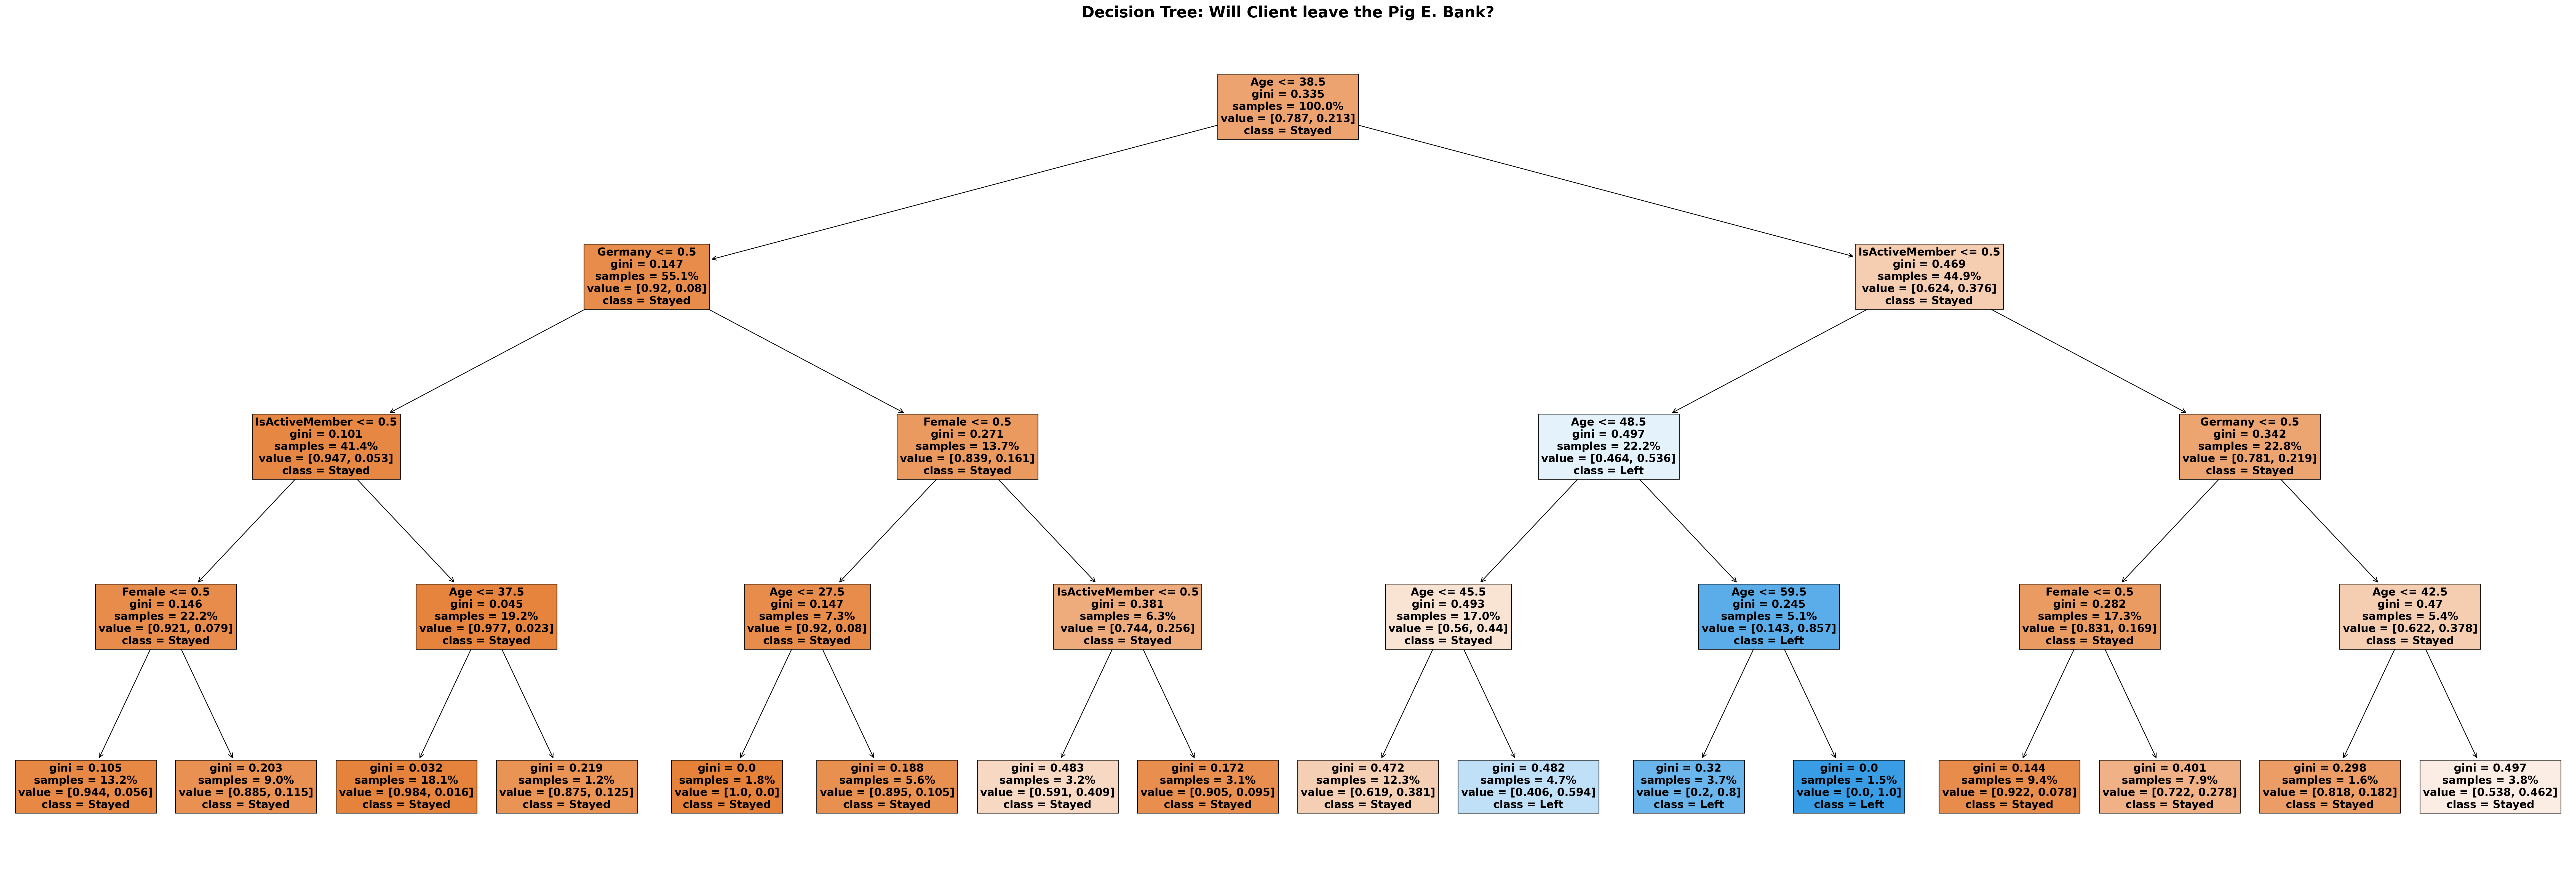

In [161]:
# Data Preparation
X = df_cleaned[['age', 'active_memebr', 'gender_female','country_germany']]
y = df_cleaned['leave_bank']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Initializing and training the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=16)
tree.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualizing the updated decision tree with figure adjustments for improved readability
plt.figure(figsize=(60,20), dpi=200)
tree_plot = plot_tree(tree, feature_names=['Age', 'IsActiveMember', 'Female', 'Germany'], class_names=['Stayed', 'Left'], filled=True, fontsize=14, proportion=True)
for text in tree_plot:
    text.set_fontweight('bold')
plt.title('Decision Tree: Will Client leave the Pig E. Bank?', fontsize=20, fontweight='bold')
exited_bank_decision_tree = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'decision_tree_PigEbank.png'))
plt.show()

# 6. Export data frames

In [163]:
#export complete dataframe set to drive
df_cleaned.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'PigEBank_cleaned_dataset.xlsx'))

In [164]:
#export complete dataframe set to drive
cust_left.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'PigEBank_customers_left_dataset.xlsx'))

In [165]:
#export complete dataframe set to drive
cust_stayed.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'PigEBank_customers_stayed_dataset.xlsx'))